In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df_old = pd.read_csv(r"C:\Users\Sooraj\Downloads\Toyoto_Corrola.csv")
df_old.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
df = pd.DataFrame(df_old[["Price", "Age_08_04", "KM", "HP", "Doors", "Gears", "Weight"]])

In [4]:
print(df_old.columns)


Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')


In [5]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
#check for missing values
df.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [7]:
df.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


# Scatterplot between variables along with histograms

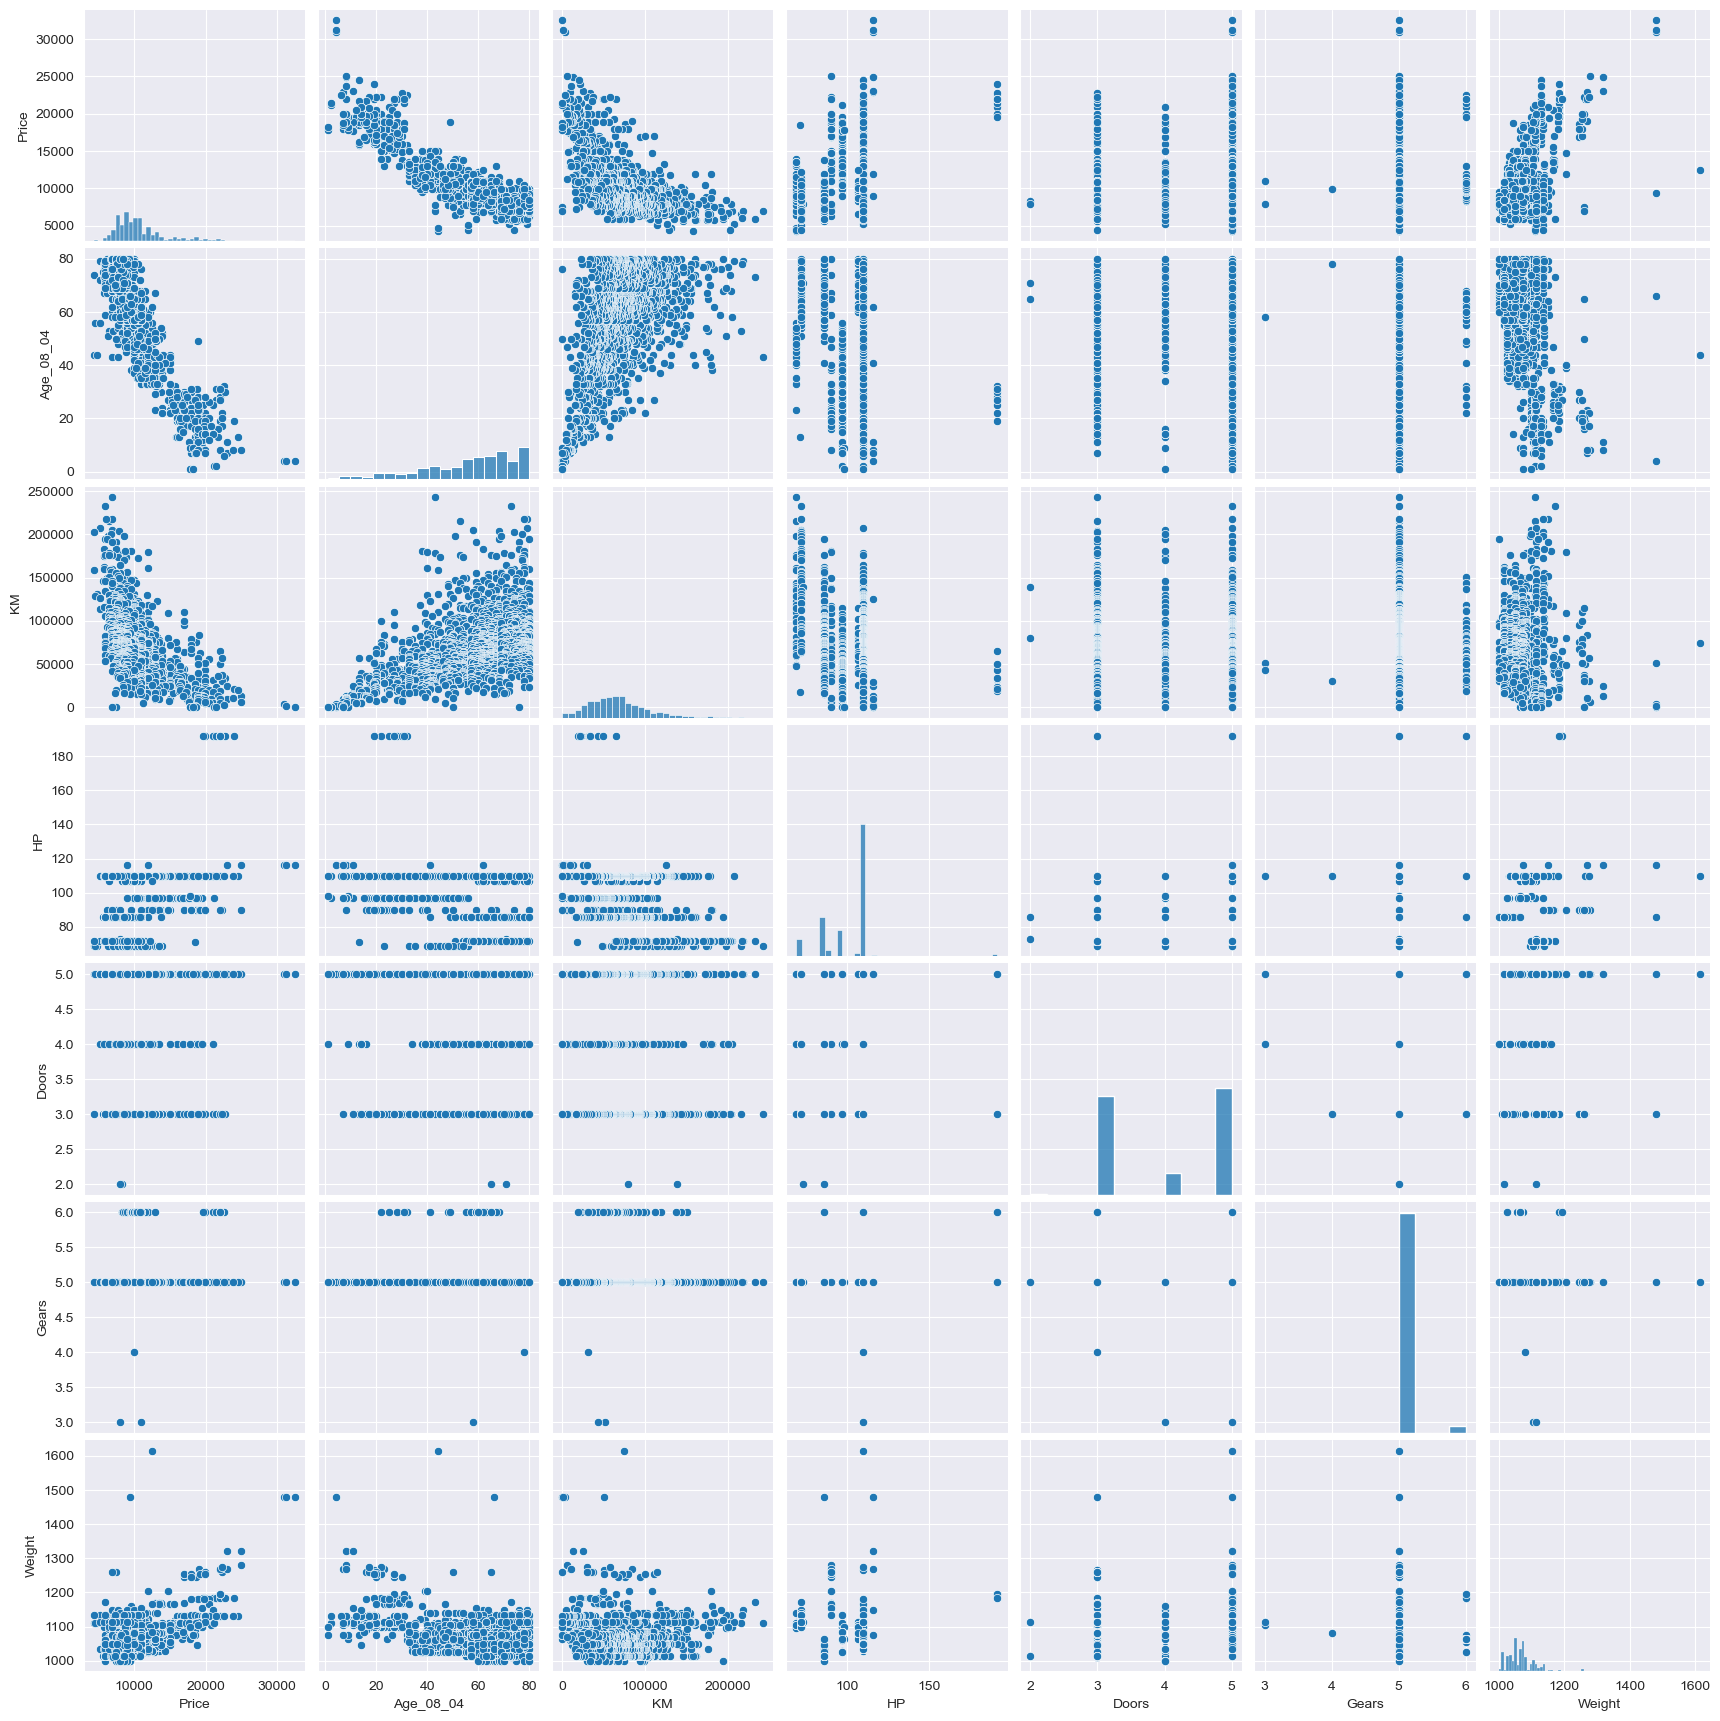

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [9]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price ~ Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data=df).fit()

In [10]:
#Coefficients
model.params

Intercept        -6984.373566
Q("Age_08_04")    -122.242218
Q("KM")             -0.019994
Q("HP")             28.350149
Q("Doors")          -9.680229
Q("Gears")         622.282925
Q("Weight")         18.609651
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept         -5.323309
Q("Age_08_04")   -46.728942
Q("KM")          -16.542560
Q("HP")           10.842418
Q("Doors")        -0.242055
Q("Gears")         3.152234
Q("Weight")       22.446903
dtype: float64 
 Intercept          1.181900e-07
Q("Age_08_04")    4.387432e-290
Q("KM")            2.238900e-56
Q("HP")            2.231791e-26
Q("Doors")         8.087723e-01
Q("Gears")         1.653931e-03
Q("Weight")        7.856458e-96
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Simple Linear Regression Models

In [13]:
ml_1=smf.ols('Price~Q("Age_08_04")',data = df).fit()  
#t and p-Values
print(ml_1.tvalues, '\n', ml_1.pvalues)  

Intercept         138.907847
Q("Age_08_04")    -68.978267
dtype: float64 
 Intercept         0.0
Q("Age_08_04")    0.0
dtype: float64


In [14]:
ml_2=smf.ols('Price ~ Q("KM")',data = df).fit()  
print(ml_2.tvalues, '\n', ml_2.pvalues)  

Intercept    88.510378
Q("KM")     -26.267601
dtype: float64 
 Intercept     0.000000e+00
Q("KM")      1.757913e-124
dtype: float64


In [15]:
ml_3=smf.ols('Price ~ Q("HP")',data = df).fit()  
print(ml_3.tvalues, '\n', ml_3.pvalues)  

Intercept     4.803134
Q("HP")      12.567862
dtype: float64 
 Intercept    1.725695e-06
Q("HP")      1.926234e-34
dtype: float64


In [16]:
ml_4=smf.ols('Price ~ Q("Doors")',data = df).fit()  
print(ml_4.tvalues, '\n', ml_4.pvalues)  

Intercept     19.258097
Q("Doors")     7.141657
dtype: float64 
 Intercept     1.094732e-73
Q("Doors")    1.461237e-12
dtype: float64


In [17]:
ml_5=smf.ols('Price ~ Q("Gears")',data = df).fit()  
print(ml_5.tvalues, '\n', ml_5.pvalues)  

Intercept     1.814534
Q("Gears")    2.394401
dtype: float64 
 Intercept     0.069804
Q("Gears")    0.016775
dtype: float64


In [18]:
ml_6=smf.ols('Price ~ Q("Weight")',data = df).fit()  
print(ml_6.tvalues, '\n', ml_6.pvalues)  

Intercept     -20.263590
Q("Weight")    27.045855
dtype: float64 
 Intercept       1.739508e-80
Q("Weight")    1.630487e-130
dtype: float64


# Calculating VIF

In [19]:
rsq_1 = smf.ols('Q("Age_08_04")~  Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data=df).fit().rsquared  
vif_1 = 1/(1-rsq_1)

rsq_2 = smf.ols(' Q("KM") ~Q("Age_08_04") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data=df).fit().rsquared  
vif_2 = 1/(1-rsq_2)

rsq_3 = smf.ols('Q("HP")~Q("Age_08_04") + Q("KM")+ Q("Doors")+ Q("Gears") + Q("Weight") ',data=df).fit().rsquared  
vif_3 = 1/(1-rsq_3)

rsq_4 = smf.ols('Q("Doors") ~ Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Gears") + Q("Weight")',data=df).fit().rsquared  
vif_4 = 1/(1-rsq_4)

rsq_5 = smf.ols(' Q("Gears") ~Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Weight")',data=df).fit().rsquared  
vif_5 = 1/(1-rsq_5)

rsq_6 = smf.ols('Q("Weight")~Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") ',data=df).fit().rsquared  
vif_6 = 1/(1-rsq_6) 


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Doors','Gears','Weight'],'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


### No Multi-Collinearity as VIF value less than 20

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

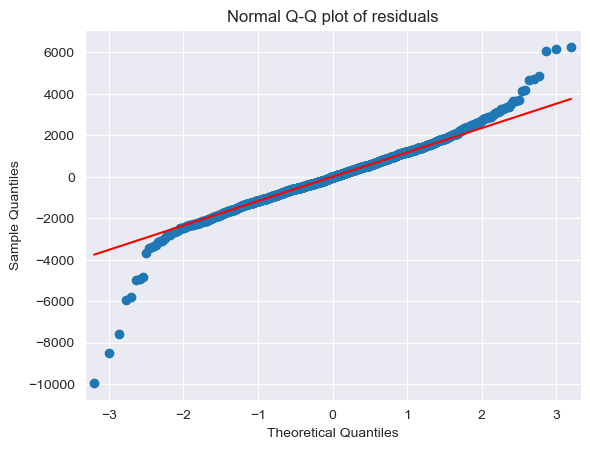

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

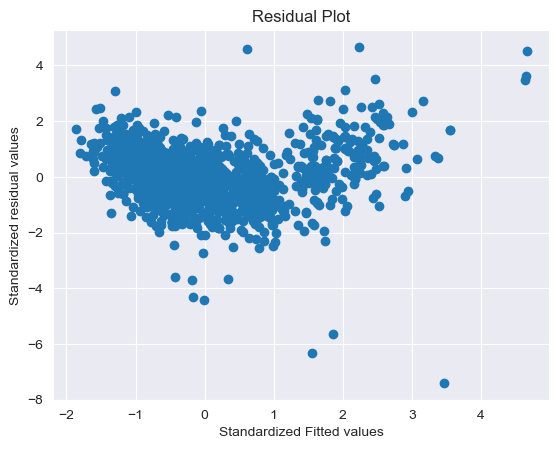

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


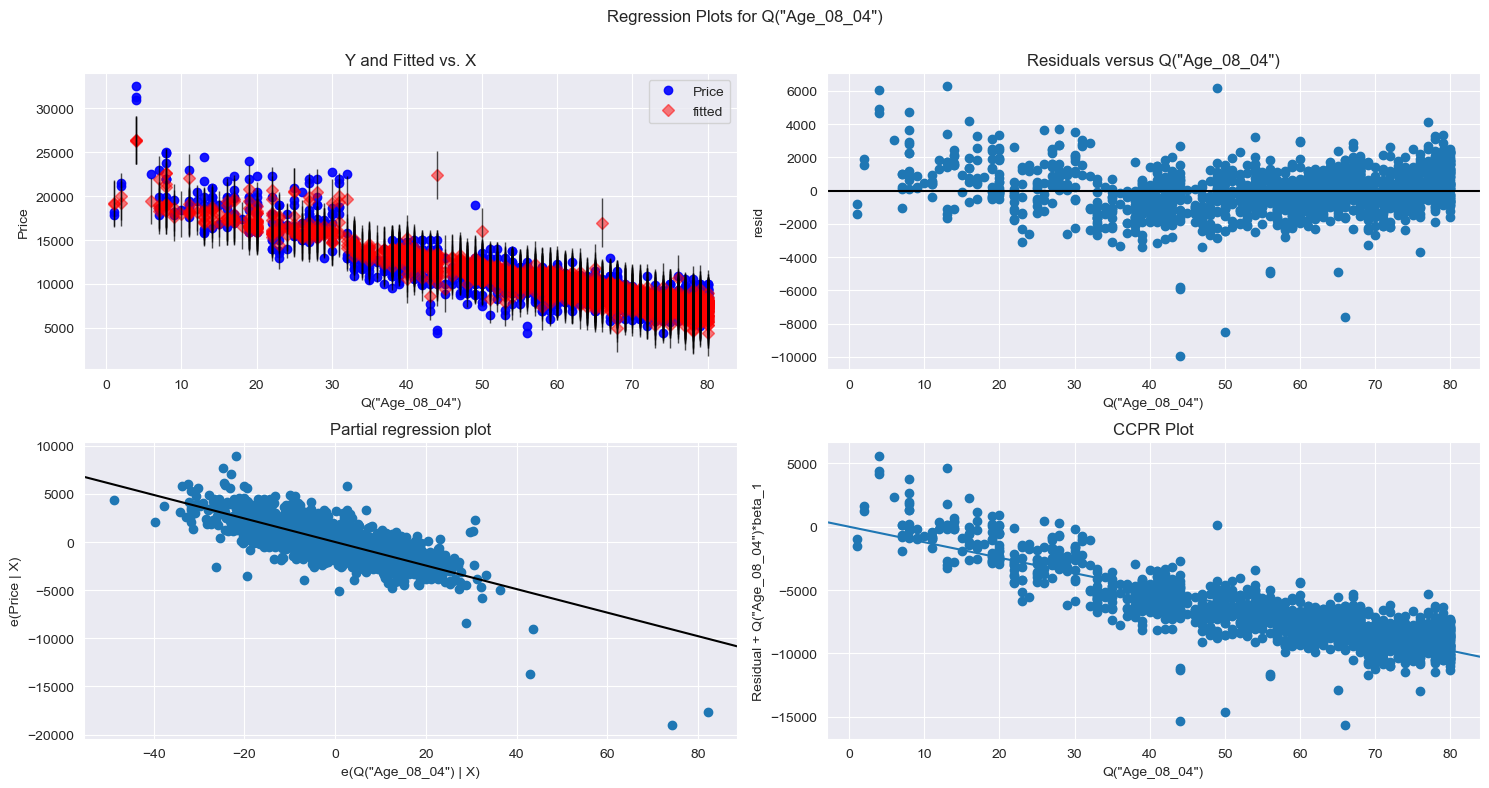

In [24]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 1, fig=fig)
plt.show()

eval_env: 1


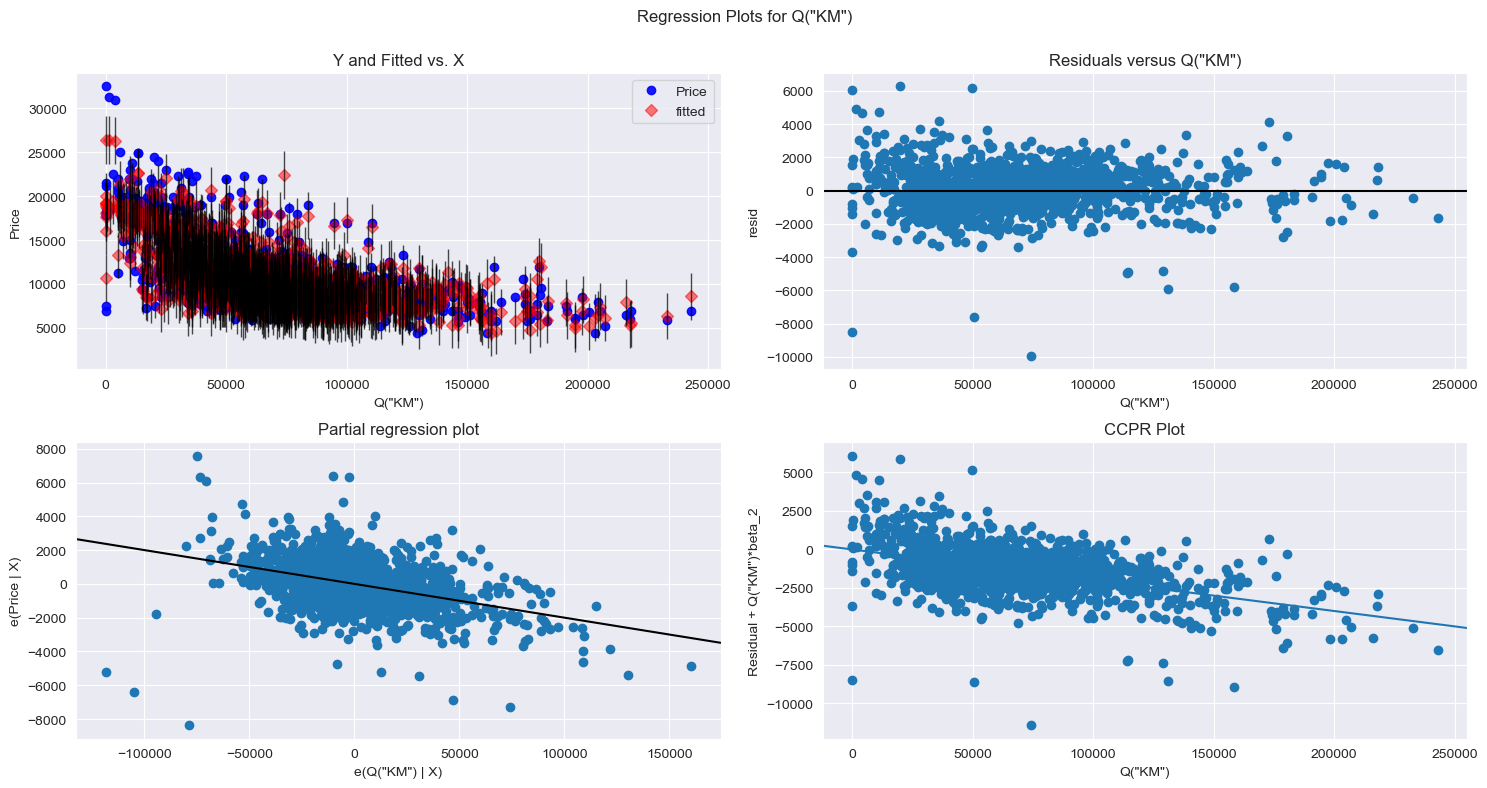

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 2, fig=fig)
plt.show()

eval_env: 1


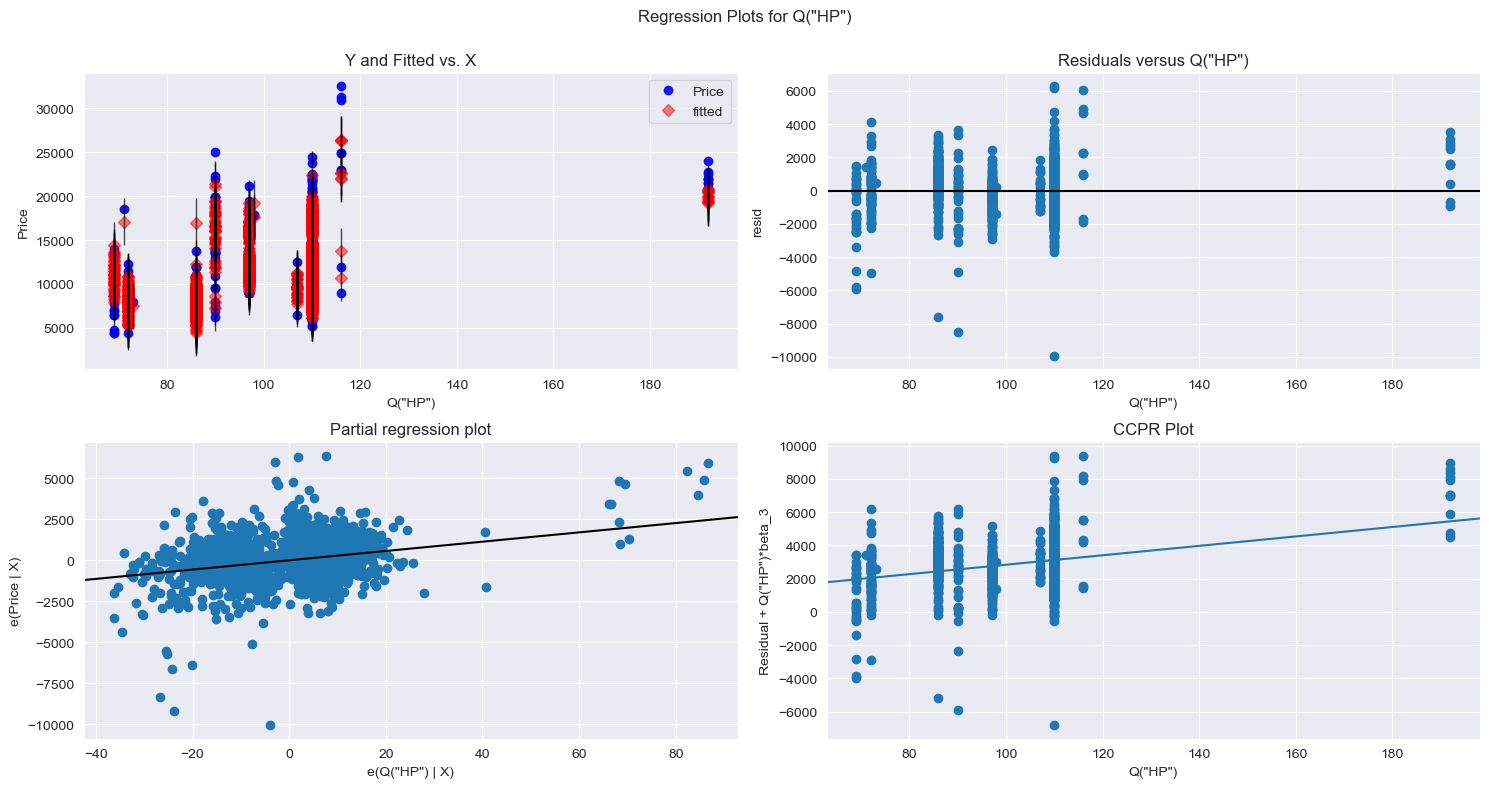

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 3, fig=fig)
plt.show()

eval_env: 1


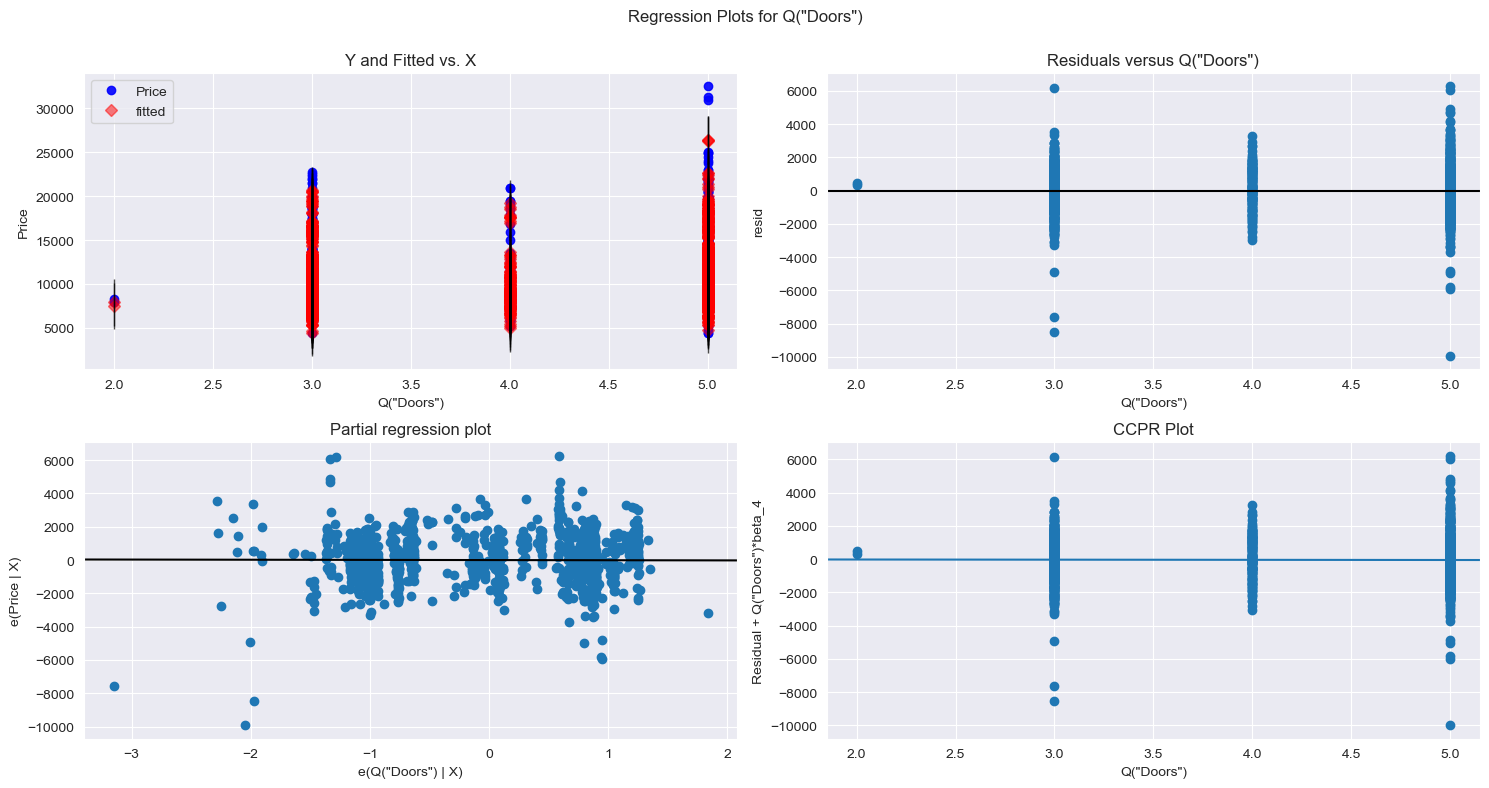

In [27]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 4, fig=fig)
plt.show()

eval_env: 1


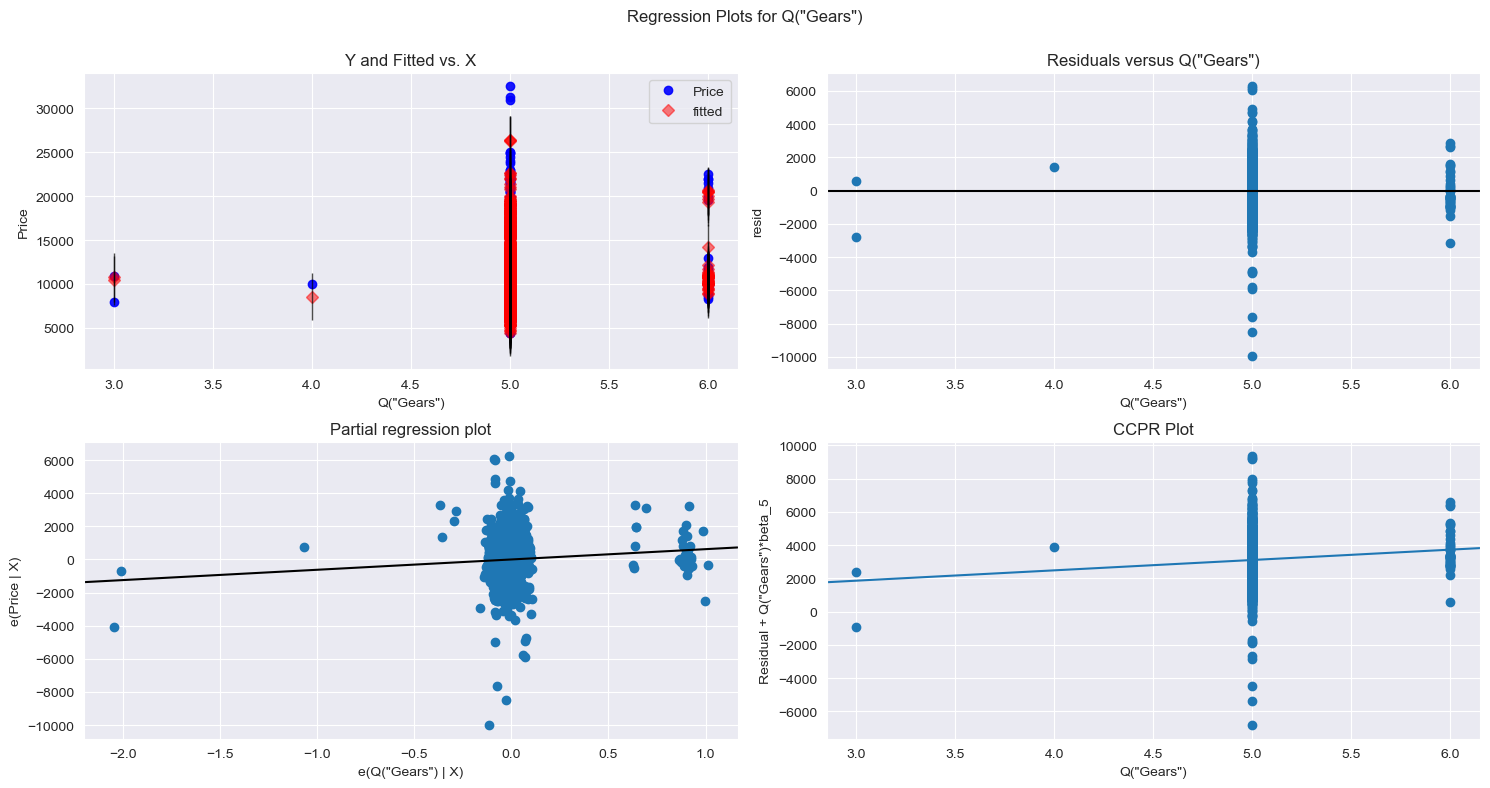

In [28]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 5, fig=fig)
plt.show()

eval_env: 1


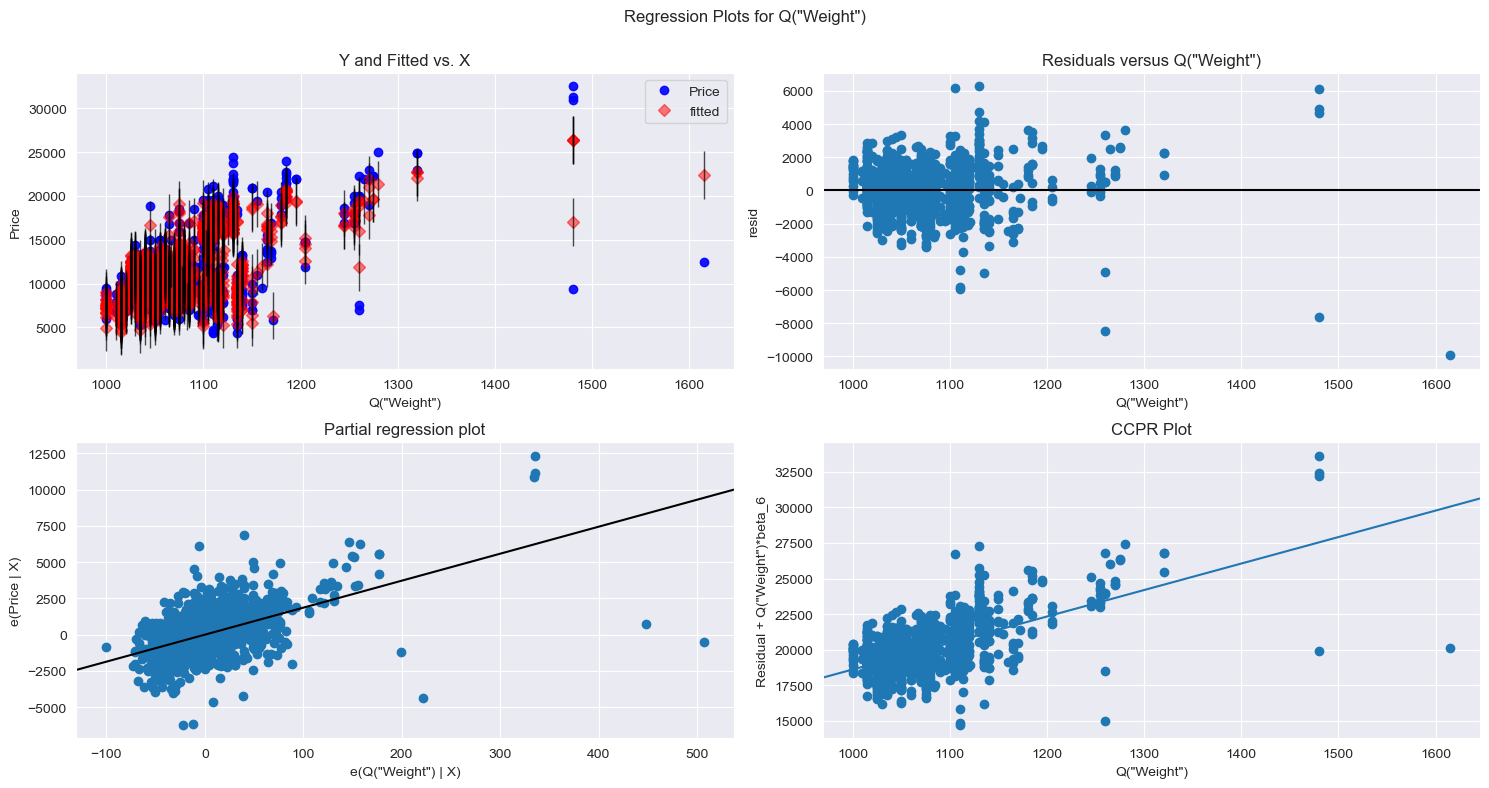

In [29]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 6, fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

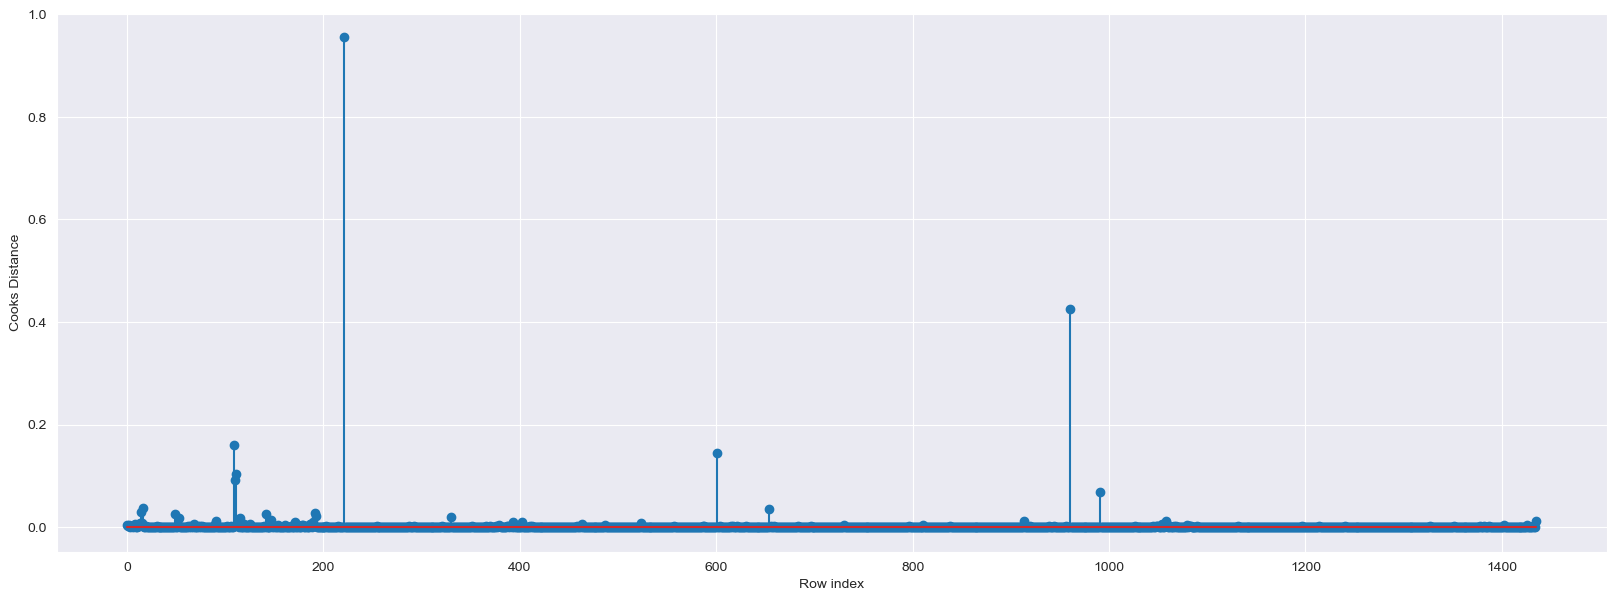

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.9553151438694859)

## High Influence points

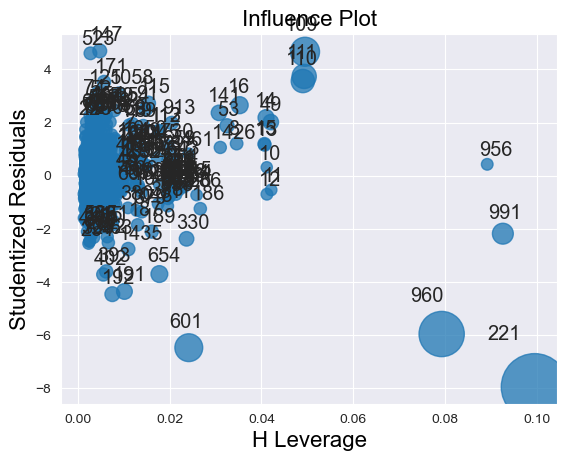

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.016713091922005572

#### From the above plot, it is evident that data point 221, 960,991,956,111,110 and 601 are the influencers

In [35]:
df[df.index.isin([221,960,991,956,111,110,601])]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
110,31000,4,4000,116,5,5,1480
111,31275,4,1500,116,5,5,1480
221,12450,44,74172,110,5,5,1615
601,7500,50,1,90,3,5,1260
956,10950,58,51421,110,5,3,1105
960,9390,66,50806,86,3,5,1480
991,7950,58,43000,110,4,3,1114


In [36]:
df.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


# Improving the model

In [37]:
#Load the data
df_new = pd.read_csv(r"C:\Users\Sooraj\Downloads\Toyoto_Corrola.csv")

In [38]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[221,960,991,956,111,110,601]],axis=0).reset_index()

In [39]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [40]:
df1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1424,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1425,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1426,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1427,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


# Build Model

In [41]:
#Include all 3 variable and generate R-Squared and AIC values
final_ml_1= smf.ols('Price ~ Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data = df1).fit()

In [42]:
(final_ml_1.rsquared,final_ml_1.aic)

(0.873625601389339, 24477.645135860857)

In [43]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_2= smf.ols('Price ~ Q("Age_08_04") + Q("KM") +  Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data = df1).fit()

In [44]:
(final_ml_2.rsquared,final_ml_2.aic)

(0.873625601389339, 24477.645135860857)

##### Comparing above R-Square and AIC values, model 'final_ml_1' has high R- square  hence include variable 'Administration' 

# Cook’s Distance

In [45]:
model_influence_V = final_ml_1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

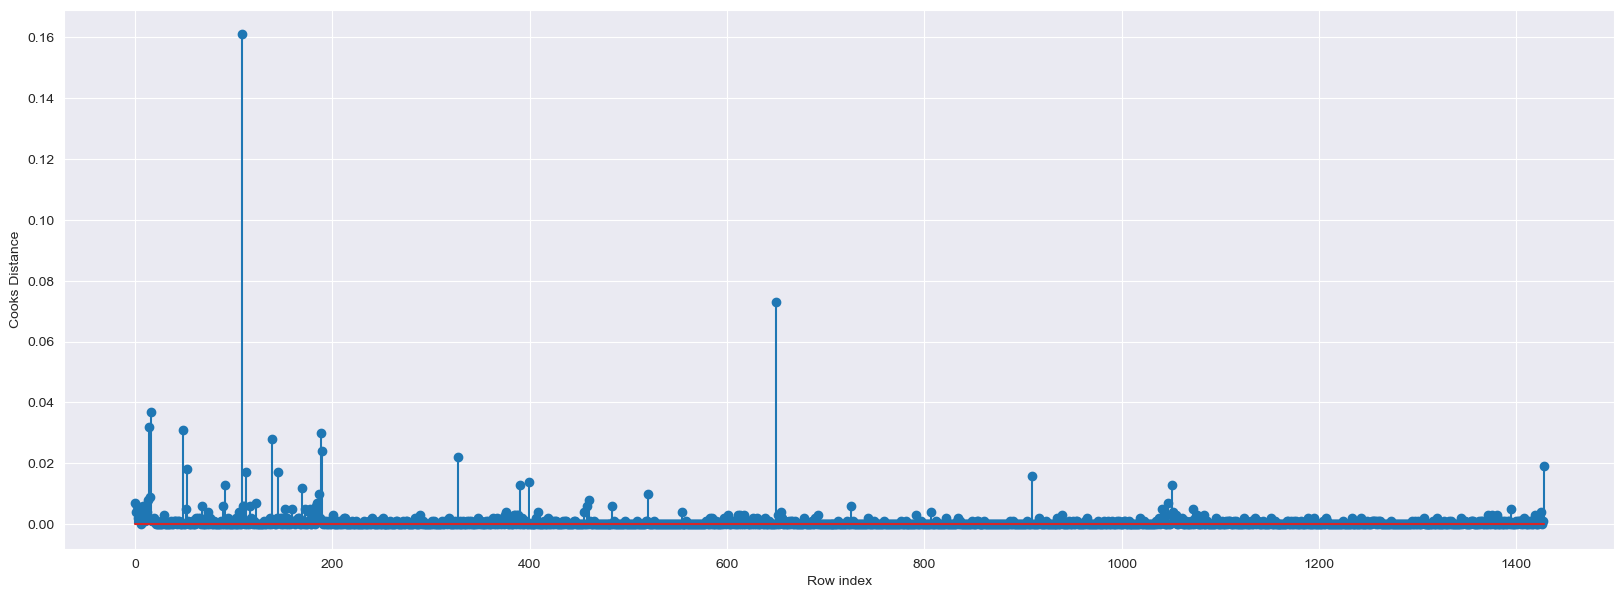

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [47]:
#index of the data points where c is more than .15
(np.argmax(c_V),np.max(c_V))

(109, 0.1613617998055367)

In [48]:
#Drop 48 observations
df2=df1.drop(df1.index[[109]],axis=0)

In [49]:
df2

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1424,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1425,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1426,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1427,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [50]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [51]:
df4=df3.drop(['index'],axis=1)

In [52]:
df4

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1423,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1424,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1425,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1426,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [53]:
#Build the model on the new data
final_ml_2= smf.ols('Price ~ Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data = df4).fit()

In [54]:
#Again check for influencers
model_influence_2 = final_ml_2.get_influence()
(c_V, _) = model_influence_2.cooks_distance

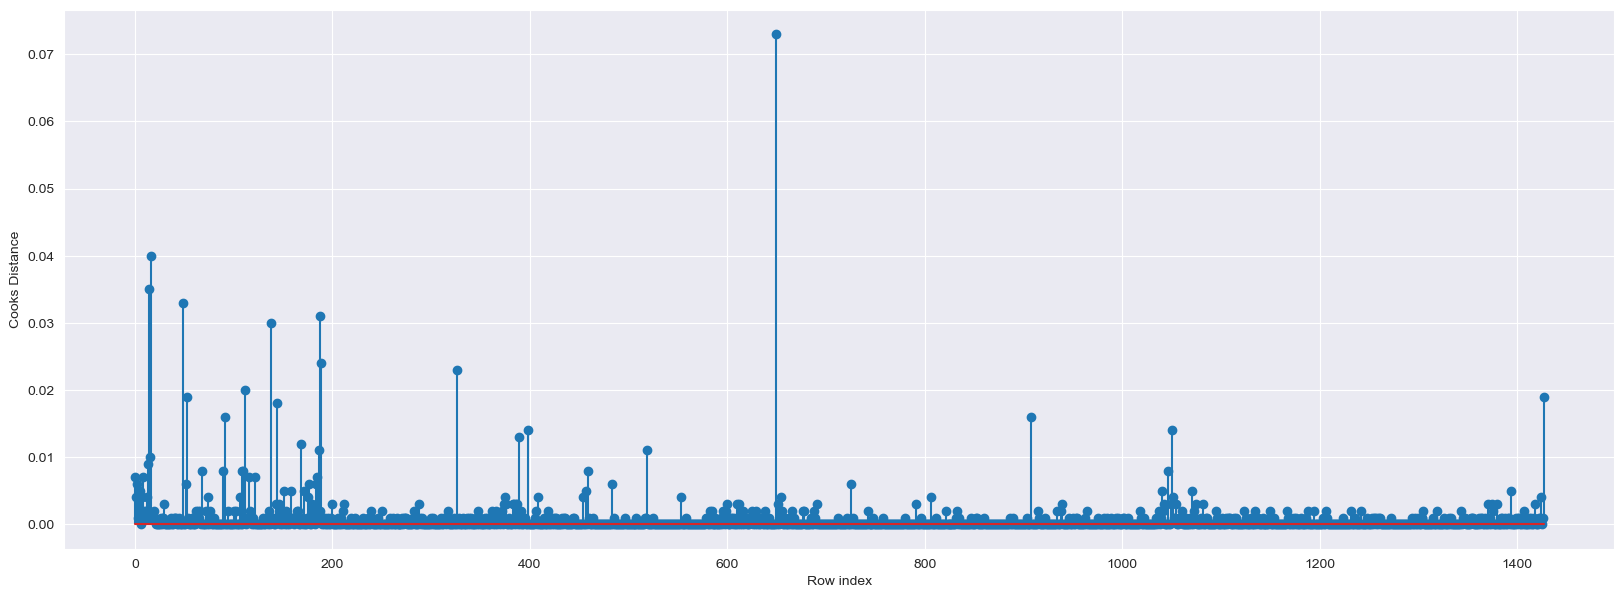

In [55]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [56]:
(np.argmax(c_V),np.max(c_V))

(649, 0.07303684353541791)

#### Since the value is significantly small , we can stop the diagnostic process and finalize the model

In [57]:
#Check the accuracy of the mode
final_ml_2= smf.ols('Price ~ Q("Age_08_04") + Q("KM") + Q("HP")+ Q("Doors")+ Q("Gears") + Q("Weight")',data = df4).fit()

In [58]:
(final_ml_2.rsquared,final_ml_2.aic)

(0.8716009014948486, 24446.052055552642)

# R square values for different models

In [59]:
R2 = {'Model':['Model 1','Model 2','Model 3'],'R-square':[model.rsquared,final_ml_1.rsquared,final_ml_2.rsquared]}

In [60]:
V2_frame = pd.DataFrame(R2) 
V2_frame

,Model,R-square
0,Model 1,0.862802
1,Model 2,0.873626
2,Model 3,0.871601


# Since the R square value of Model 2 is more we can utilize that model for better accuracy